In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

In [2]:
df1= pd.read_csv('./eda_feature_engineered.csv')
df_train= pd.read_csv('./datasets/train.csv')
df_test= pd.read_csv('./datasets/test.csv')

In [3]:
df1.corr()

,Id,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice,Total_Sqft
Id,1.000000,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,0.008555,-0.038346,-0.022650,...,-0.037560,-0.050730,-0.048666,-0.045201,-0.009045,0.001382,0.127723,-0.975747,-0.051398,-0.035096
Lot Area,0.032872,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,0.041184,0.277175,0.381593,...,0.289467,0.004882,0.214954,0.263296,0.155623,0.140864,0.003197,-0.029454,0.296566,0.360591
Overall Qual,-0.061483,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,0.275773,0.548742,0.477136,...,0.388920,0.574553,0.587423,0.563814,0.257081,0.308855,0.019242,-0.011578,0.800207,0.665615
Overall Cond,-0.026096,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,-0.130521,-0.158643,-0.150938,...,-0.006463,-0.331765,-0.168513,-0.137917,0.011034,-0.052266,-0.003144,0.047664,-0.097019,-0.145466
Year Built,-0.064444,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,0.136662,0.410254,0.323315,...,0.168848,0.825316,0.542544,0.487177,0.216339,0.207798,-0.007083,-0.003559,0.571849,0.412684
Year Remod/Add,-0.090040,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,0.160066,0.308545,0.244190,...,0.138858,0.674024,0.441796,0.398999,0.216271,0.264476,0.011568,0.042744,0.550370,0.395620
Mas Vnr Area,-0.035493,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,0.085853,0.408575,0.391349,...,0.269104,0.266763,0.361211,0.384718,0.163584,0.163489,-0.001472,-0.018719,0.512230,0.468395
Bsmt Unf SF,0.008555,0.041184,0.275773,-0.130521,0.136662,0.160066,0.085853,1.000000,0.419238,0.302299,...,0.001821,0.177751,0.167905,0.145080,-0.034438,0.116019,0.020043,-0.043683,0.190210,0.347505
Total Bsmt SF,-0.038346,0.277175,0.548742,-0.158643,0.410254,0.308545,0.408575,0.419238,1.000000,0.808756,...,0.333100,0.348384,0.432979,0.488805,0.224659,0.257227,0.003915,-0.004280,0.628925,0.821524
1st Flr SF,-0.022650,0.381593,0.477136,-0.150938,0.323315,0.244190,0.391349,0.302299,0.808756,1.000000,...,0.394729,0.264124,0.438981,0.498712,0.226243,0.259072,0.027038,-0.007432,0.618486,0.785317


In [4]:
##Feature Engineering***

In [5]:
###INTERACTION BETWEEN 'OVERALL QUALITY AND YEAR REMOD/ADD'

In [6]:
df1['Year Remod/Add * Overall Qual'] = df1['Year Remod/Add'] * df1['Overall Qual']

In [7]:
features = ['Total_Sqft','Lot Area','Year Remod/Add','Overall Qual','Bsmt Unf SF','Year Remod/Add * Overall Qual']
X = df1[features] 
y = df1['SalePrice']

In [8]:
##Corelation of matrix

In [9]:
X.corr()

,Total_Sqft,Lot Area,Year Remod/Add,Overall Qual,Bsmt Unf SF,Year Remod/Add * Overall Qual
Total_Sqft,1.000000,0.360591,0.395620,0.665615,0.347505,0.666245
Lot Area,0.360591,1.000000,0.050771,0.105824,0.041184,0.105641
Year Remod/Add,0.395620,0.050771,1.000000,0.584654,0.160066,0.610971
Overall Qual,0.665615,0.105824,0.584654,1.000000,0.275773,0.999418
Bsmt Unf SF,0.347505,0.041184,0.160066,0.275773,1.000000,0.276479
Year Remod/Add * Overall Qual,0.666245,0.105641,0.610971,0.999418,0.276479,1.000000


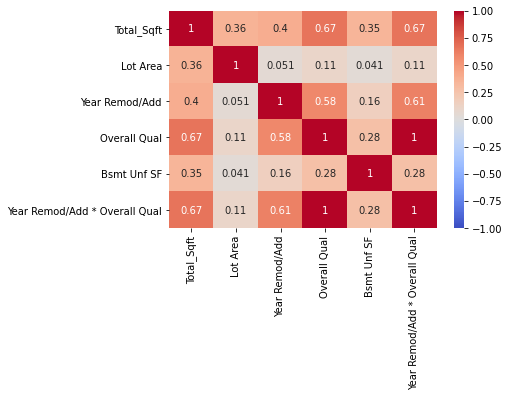

In [10]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

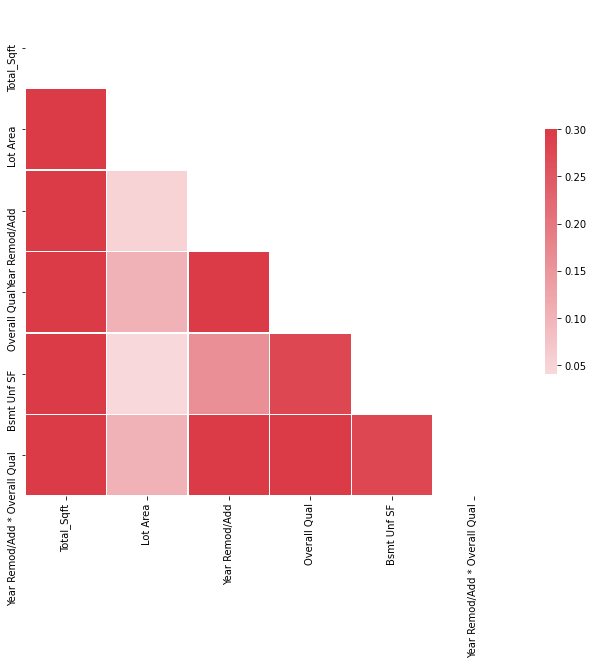

In [11]:
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Scale=Z score

In [12]:
ss= StandardScaler()
ss.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
print(ss.mean_)

[2.69355610e+03 1.00652082e+04 1.98419015e+03 6.11214042e+00
 5.67728293e+02 1.21451819e+04]


In [14]:
ss = StandardScaler()
ss.fit(X)
print('means', ss.mean_)
print('stds', ss.scale_)
X_scaled = ss.transform(X)
X_scaled[:6]

means [2.69355610e+03 1.00652082e+04 1.98419015e+03 6.11214042e+00
 5.67728293e+02 1.21451819e+04]
stds [8.80595358e+02 6.74084500e+03 2.10311213e+01 1.42592280e+00
 4.44846247e+02 2.90781366e+03]


array([[-0.50597144,  0.51207108,  0.98947881, -0.0786441 , -0.84462507,
        -0.03961116],
       [ 0.47177617,  0.21166364,  0.60909015,  0.62265614, -0.65579578,
         0.63065187],
       [-0.59909025, -0.31794355,  1.08457597, -0.77994434, -0.5433974 ,
        -0.72569363],
       [-0.86936195, -0.03904677,  1.08457597, -0.77994434, -0.41301527,
        -0.72569363],
       [-0.58319192,  0.61858592,  0.41889582, -0.0786441 ,  0.2433913 ,
        -0.06437203],
       [ 0.80791239,  0.95341041,  0.84683306, -0.0786441 , -0.02411686,
        -0.04580137]])

In [15]:
#GENERATE REGRESSION MODEL AND MODEL VALIDATION***

In [16]:
from sklearn.model_selection import train_test_split

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
X_train.head()

,Total_Sqft,Lot Area,Year Remod/Add,Overall Qual,Bsmt Unf SF,Year Remod/Add * Overall Qual
532,3218.0,10667,1971,6,749.0,11826
415,3793.0,12888,1980,7,717.0,13860
273,1922.0,7200,2002,5,317.0,10010
1460,3906.0,14000,1997,7,105.0,13979
250,4022.0,11929,1995,8,1242.0,15960


In [19]:
df1.shape

(2051, 39)

In [20]:
X_train.shape

(1538, 6)

In [21]:
y_test.shape

(513,)

In [22]:
y_train.head(
)

532     167300
415     219000
273     129000
1460    328000
250     290000
Name: SalePrice, dtype: int64

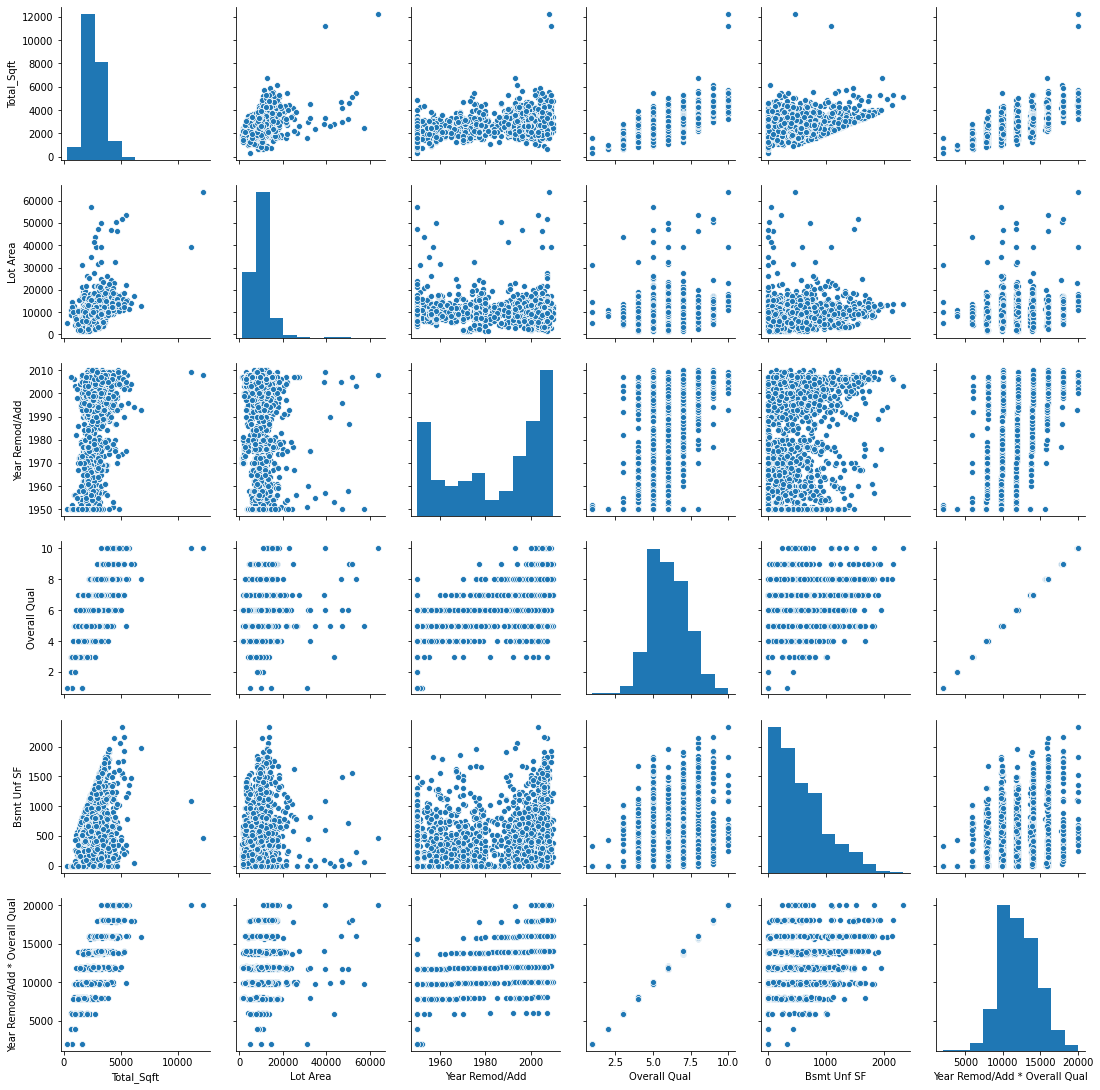

In [23]:
sns.pairplot(X_train)

In [24]:
##We find that there are quite a few features that seem to show strong correlation to SalePrice, such as OverallQual, TotalBsmtSF, Total_sqft, and Year Remod/Add. This confirms our natural intuition: we would expect that high quality, big house with big lot area with overall quality to be more expensive.
##We also note the occurrence of cone shapes, an artifact of our skewed distributions. Once we log transform some of these features, the relationship will be more linear.

In [25]:
###FITTING MODEL***

In [26]:
X_train.fillna(X_train.mean(), inplace=True)

/Users/upasanamahanta/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
y_train.fillna(y_train.mean(), inplace=True)

In [28]:
y_test.fillna(y_test.mean(), inplace=True)


In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
##Model evaluation***Baseline score***

In [32]:
lr.score(X_test,y_test)

0.8556282468368013

In [33]:
lr.score(X_train, y_train)

0.7974330694026652

In [34]:
###Model is slightly overfitting as test score is .85 and train score is .79.But it is acceptable.

In [35]:
lr.coef_

array([ 3.48813870e+01,  1.35721637e+00, -2.12502402e+03, -9.04701912e+05,
       -2.17171815e+01,  4.68113945e+02])

In [36]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.7718800193095575

In [37]:
###Cross value score of training set is .77

In [38]:
def adjusted_r2(n, p, y, y_preds):
    return 1 - (1 - r2_score(y, y_preds)) * ((n-1) / (n - p - 1))

In [39]:
def scores(model, X, y):
    print(f'r2 score: {r2_score(y, lr.predict(X))}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y, lr.predict(X)))}')

In [40]:
from sklearn.metrics import r2_score
train_pred = lr.predict(X_test)
train_pred[:10]
r2_score(y_test, train_pred)

0.8556282468368013

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
print('Training Scores:')
scores(lr, X_train, y_train)
print(f'adjusted r2 score: {adjusted_r2(X_train.shape[0], X_train.shape[1], y_train, lr.predict(X_train))}')

Training Scores:
r2 score: 0.7974330694026652
RMSE: 35792.99721777969
adjusted r2 score: 0.796639208146242


In [43]:
print('Testing Scores:')
scores(lr, X_test, y_test)
print(f'adjusted r2 score: {adjusted_r2(X_test.shape[0], X_test.shape[1], y_test, lr.predict(X_test))}')

Testing Scores:
r2 score: 0.8556282468368013
RMSE: 29773.24528465756
adjusted r2 score: 0.8539163288151033


Training r2 score .79
This means that our features explain approximately 80% of the variance in our target variable. 

In [44]:
pred = lr.predict(X_test)


In [45]:
residuals = y_test - pred

In [46]:
pred

array([119670.24864377, 200649.58527474, 262954.71519816, 131466.67016142,
       211516.84356446, 339481.4944224 , 191377.1317142 , 304469.50773879,
       154870.45875515, 103506.28661385, 133047.55650467, 211933.986063  ,
       163658.89866685, 110689.23007044, 109848.94712133,  89507.31828056,
       116994.68216371, 214544.30604513, 335890.05868455, 208192.3827009 ,
       219303.04024706, 205407.31819754, 144959.50380226, 125803.31591298,
       147746.2242119 , 247220.65316879, 151610.13724519, 126528.13083927,
       247292.03599847,  98580.1631058 , 309276.61736391, 109359.88434421,
       136484.38004485, 195081.09622443, 214877.61234159,  90200.00027772,
       148652.53872339, 240703.60557881, 335242.47334586, 100249.69019949,
       222328.98334333, 230073.33267406, 290876.71449561, 192088.29154902,
        82791.76748585, 153669.00508541, 107768.33484628, 119636.18555136,
       283420.8243873 , 128938.40424328, 328388.89038143, 109835.45931983,
       124978.98103616, 2

(array([  1.,   2.,   9.,  28., 147., 232.,  59.,  25.,   4.,   6.]),
 array([-141229.11525465, -114693.40913423,  -88157.70301382,
         -61621.9968934 ,  -35086.29077298,   -8550.58465257,
          17985.12146785,   44520.82758826,   71056.53370868,
          97592.2398291 ,  124127.94594951]),
 <a list of 10 Patch objects>)

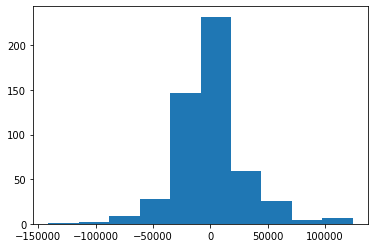

In [47]:
plt.hist(residuals)

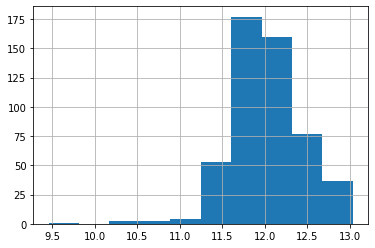

In [48]:
np.log(y_test).hist();

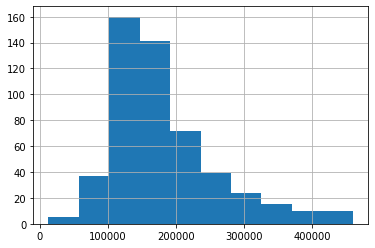

In [49]:
np.exp(np.log(y_test)).hist();

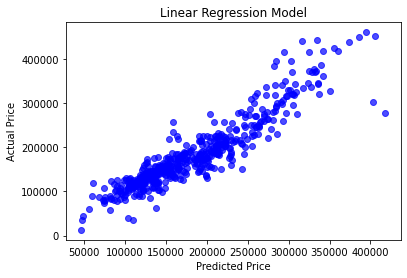

In [50]:
actual_values = y_test
plt.scatter(pred, actual_values, alpha=.7,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [51]:
##How actul price and predicted price in this model linearaly corelated can see from above

In [52]:
##Hypothesis testing

In [53]:
import statsmodels.api as sm

In [54]:
features = ['Total_Sqft','Lot Area','Year Remod/Add','Overall Qual','Bsmt Unf SF','Year Remod/Add * Overall Qual']
X = df1[features] 
X =sm.add_constant(X)


In [55]:
X.fillna(X.mean(), inplace=True)

In [56]:
model=sm.OLS(y,X).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1482.
Date:                Fri, 10 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:12:50   Log-Likelihood:                -24326.
No. Observations:                2051   AIC:                         4.867e+04
Df Residuals:                    2044   BIC:                         4.871e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          4.158e+06   3.32e+05     12.543      0.000    3.51e+06    4.81e+06
Total_Sqft                       39.1508      1.296     30.214      0.000      36.610      41.692
Lot Area                          0.9867      0.123      8.003      0.000       0.745       1.229
Year Remod/Add                -2131.7703    167.142    -12.754      0.000   -2459.557   -1803.984
Overall Qual                  -8.953e+05   5.72e+04    -15.649      0.000   -1.01e+06   -7.83e+05
Bsmt Unf SF                     -22.7867      1.834    -12.428      0.000     -26.383     -19.191
Year Remod/Add * Overall Qual   462.9807     28.780     16.087      0.000     406.539     519.422
==============================================================================
Omnibus:                     1724.366   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           395548.479
Skew:                          -3.100   Prob(JB):                         0.00
Kurtosis:                      70.750   Cond. No.                     7.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
###Since our p-value is below 0.05, we reject the null hypothesis. 
##There is enough evidence to say that sales price between the fatures differ significantly.


In [59]:
##testing set

In [60]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [61]:
df_test.shape

(878, 80)

In [62]:
df_train.shape

(2051, 81)

In [63]:
df_test['Year Remod/Add * Overall Qual'] = df_test['Year Remod/Add'] * df_test['Overall Qual']

In [64]:
df_test['Total_Sqft']= df_test['Total Bsmt SF']+df_test['Wood Deck SF']+df_test['Open Porch SF']+df_test['1st Flr SF']+df_test['2nd Flr SF']

In [65]:
##Answer problem***

In [66]:
X_test.shape

(513, 6)

In [67]:
X_test = df_test[['Total_Sqft','Lot Area','Year Remod/Add','Overall Qual','Bsmt Unf SF','Year Remod/Add * Overall Qual']]
y_hat = lr.predict(X_test)
y_hat

array([146976.07373575, 163045.10960588, 224778.70079026, 113818.61136451,
       156430.150595  ,  84227.77462477,  82535.43861191, 135898.68733081,
       200413.88126743, 175531.75700983, 156306.05922734, 144854.13728486,
       136885.28812726, 269612.13146296, 176263.77493548, 118830.67411966,
       140994.61797993, 115093.86323534, 209926.71285979, 233744.25066728,
       152680.27533161, 124310.14387168, 194524.64564888, 165618.74250389,
       203332.5715477 , 108144.34653472, 110097.34742283, 134143.61799465,
       142470.44842126,  64287.20060825,  88430.24069888,  87975.96482684,
       251564.43440707, 155952.11874886, 209993.84064081, 206988.89835053,
       114536.42346781,  82582.72626544, 105620.96083095, 204646.13579335,
       156408.55212129, 212707.17577896, 133988.53555231, 165818.13108107,
       209132.34544823,  77056.05001189, 221506.70061426, 130662.18588132,
       117986.52491782, 124520.02543913, 119061.29322331, 251919.36483621,
       257554.19810498, 1

In [68]:
X_test.shape

(878, 6)

In [69]:

my_submission12 = pd.DataFrame({'Id': df_test['Id'],'SalePrice': y_hat,})
my_submission12.head()

,Id,SalePrice
0,2658,146976.073736
1,2718,163045.109606
2,2414,224778.700790
3,1989,113818.611365
4,625,156430.150595


In [70]:
my_submission12.to_csv('my_submission12.csv',index=False)

## 